In [1]:
setwd('data')
getwd()
list.files()

[1] "C:/Users/Tim/Documents/DAND/P4/ProsperLoanProject/ProsperLoanEDA/data"

[1] "prosperLoanData.csv"

In [46]:
loans <- read.csv('prosperLoanData.csv')

In [11]:
library(plyr)
library(ggplot2)
library(dplyr)
library(stringr)

ERROR: Error in library("ggthemes"): there is no package called 'ggthemes'


In [14]:
library(ggthemes)

Warning message:
"package 'ggthemes' was built under R version 3.3.3"

## Frequency of Term by Income Range

In [72]:
loans$IncomeRange <- factor(loans$IncomeRange, levels = c("$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", 
                                                            "$100,000+", "Not displayed", "Not employed"))

In [7]:
#Count of Term by Income Range
loans %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) 

Term,IncomeRange,num_loans
12,"$1-24,999",77
12,"$25,000-49,999",381
12,"$50,000-74,999",432
12,"$100,000+",387
12,Not employed,26
12,NA,311
36,$0,617
36,"$1-24,999",6409
36,"$25,000-49,999",25485
36,"$50,000-74,999",22682


In [6]:
#Frequency of Income Range by Term
loans %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) 

Term,IncomeRange,num_loans,frequency
12,"$1-24,999",77,6.02975724
12,"$25,000-49,999",381,29.83555208
12,"$50,000-74,999",432,33.82928739
12,"$100,000+",387,30.30540329
36,$0,617,0.91620510
36,"$1-24,999",6409,9.51695054
36,"$25,000-49,999",25485,37.84357691
36,"$50,000-74,999",22682,33.68130318
36,"$100,000+",12150,18.04196427
60,$0,4,0.02014707


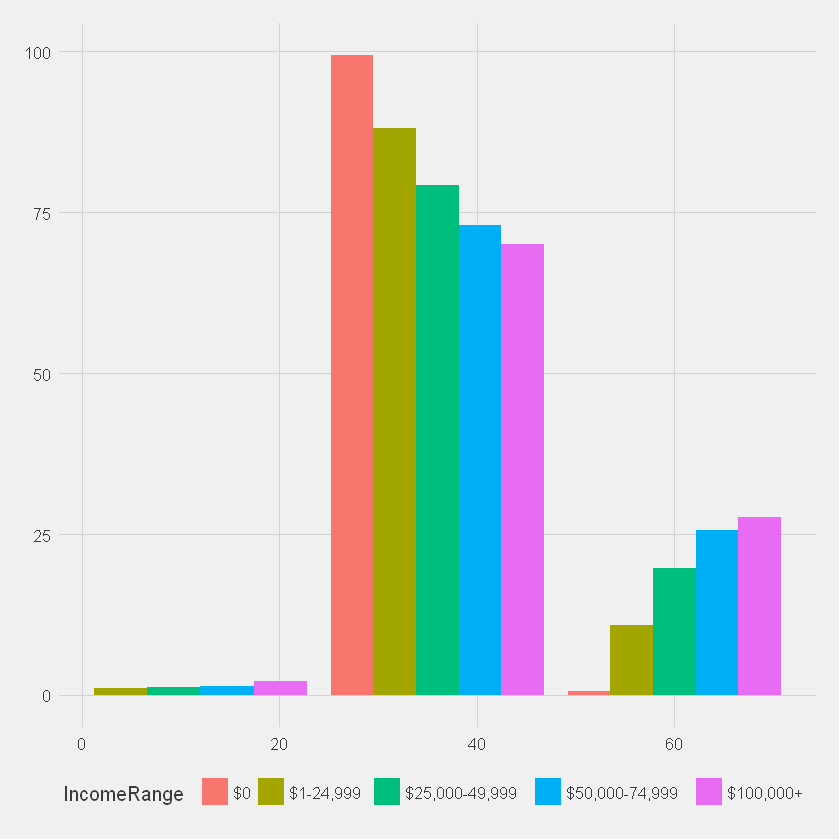

In [21]:
loans %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(IncomeRange, Term) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) %>%
ggplot(aes(x=Term, y=frequency,fill=IncomeRange)) + geom_bar(stat="identity", position="dodge") + theme_fivethirtyeight() 


This is interesting. In the shortest term 1-year loans the higher the Income Range the higher the portion of loans made in that income range.  
For the middle-term loans the opposite is true, and then in the 5 year term a similar pattern to the 1 yr loans reemerges. 
It is also interesting to note is that there were no 1-year loans made to people who are in the 0% income range.   

## Proportion per Term by Loan Status

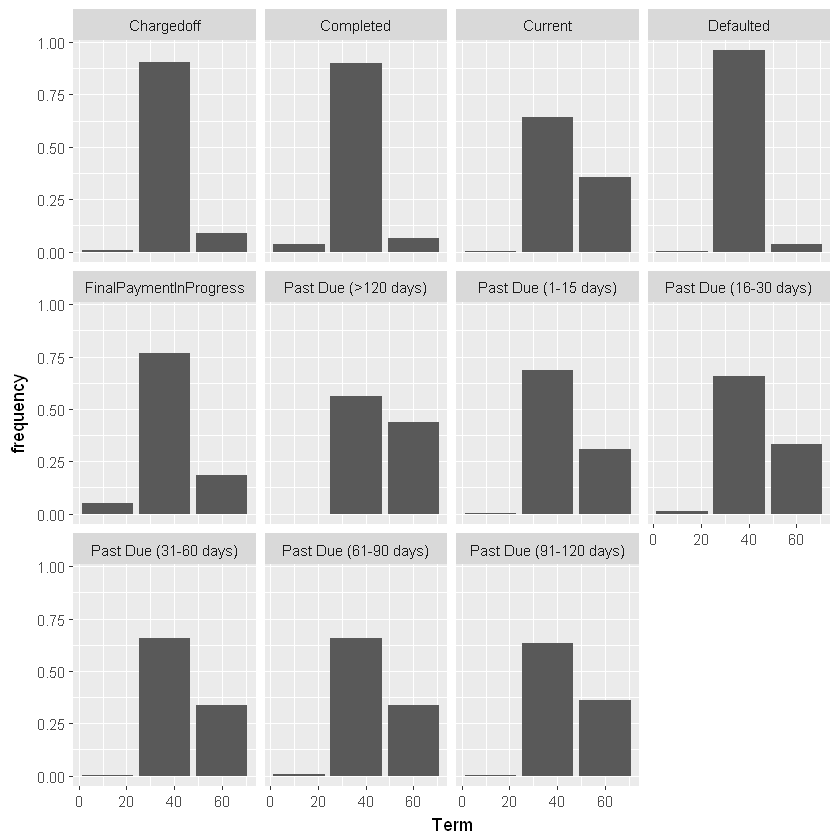

In [22]:
loans %>%
filter(!LoanStatus == 'Cancelled') %>%
group_by(LoanStatus, Term) %>%
summarise(number_loans = n()) %>%
mutate(frequency = number_loans / sum(number_loans)) %>%
ggplot(aes(x=Term, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~LoanStatus)

## BorrowerApr by Term

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

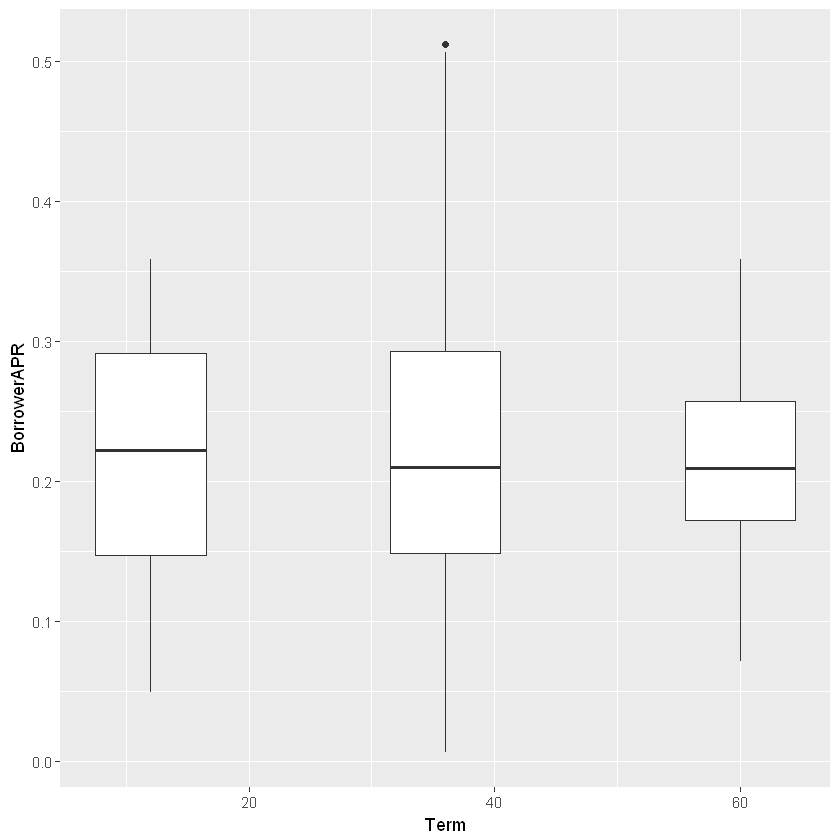

In [23]:
ggplot(loans, aes(x=Term,y=BorrowerAPR, group=Term)) + geom_boxplot()

## Estimated Effective Yield by Term

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

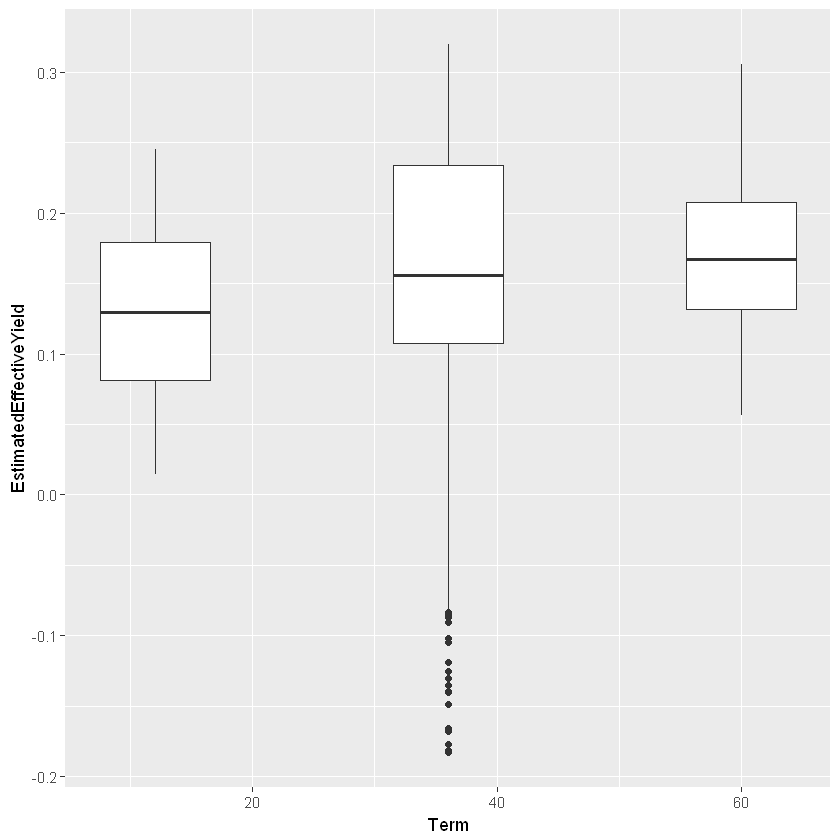

In [24]:
ggplot(loans, aes(x=Term,y=EstimatedEffectiveYield,group=Term)) + geom_boxplot()

## Original Loan Amount by Term

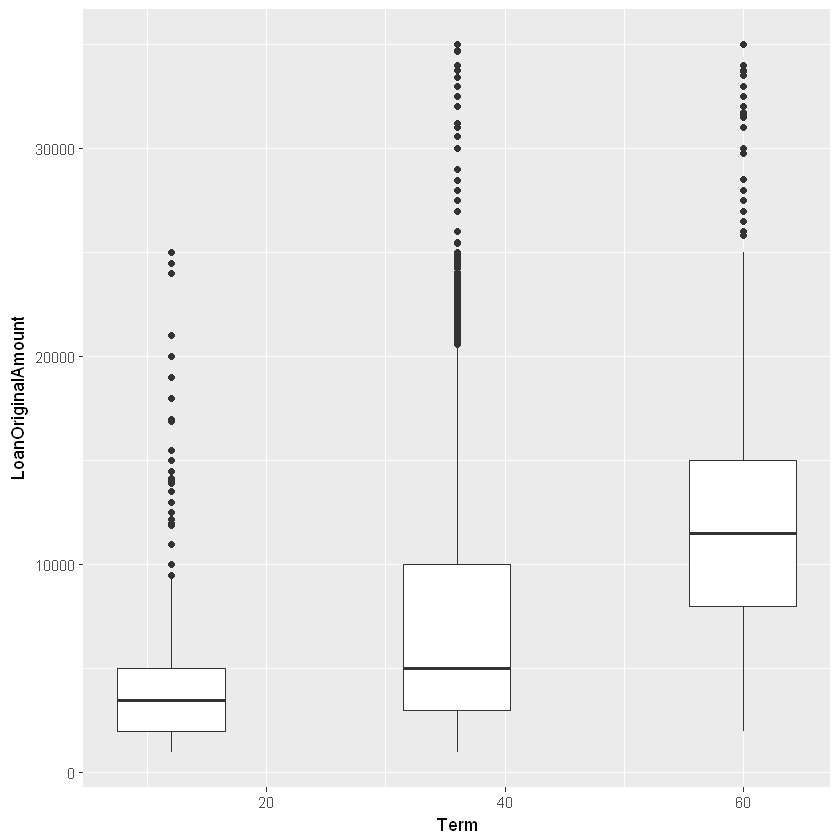

In [25]:
ggplot(loans, aes(x=Term,y=LoanOriginalAmount,group=Term)) + geom_boxplot()

## Borrower APR by Loan Status

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

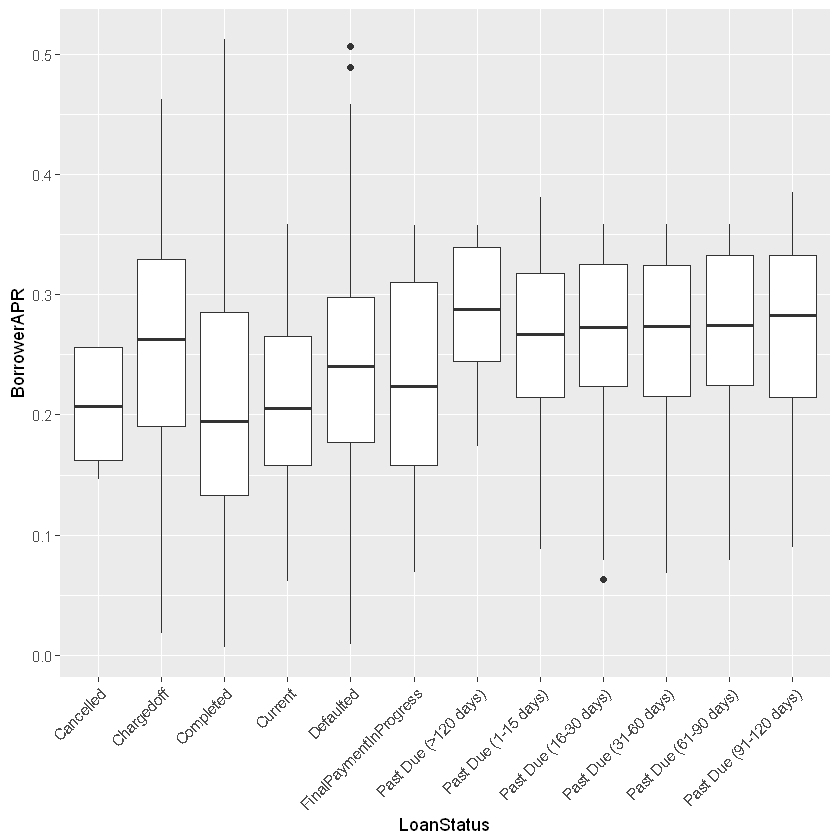

In [26]:
ggplot(loans, aes(x=LoanStatus,y=BorrowerAPR,group=LoanStatus)) + geom_boxplot() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Completed and Current loans tend to have a lower APR than loans that are Past Due or that have Defaulted.

## Listing Category and Loan Status

In [78]:
#can delete when combine
#simplify listing category
listingToCharacter <- function(numeric.category){
    listing.categories = c("Not Available", "Debt Consolidation", "Home Improvement", "Business",
                       "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption","Boat",
                       "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
                       "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation",
                       "Wedding Loans")
    return(listing.categories[numeric.category + 1]) 
}

In [79]:
#can delete when combine
loans$ListingCategory <- listingToCharacter(loans$ListingCategory..numeric)

In [57]:
#can delete when combine
#fix loan status factors
loans$LoanStatus <- factor(loans$LoanStatus, levels = c('Cancelled',
                                                          'Defaulted',
                                                          'Chargedoff',
                                                          'Completed',
                                                          'Current',
                                                          'FinalPaymentInProgress',
                                                          'Past Due (1-15 days)',
                                                          'Past Due (16-30 days)',
                                                          'Past Due (31-60 days)',
                                                          'Past Due (61-90 days)',
                                                          'Past Due (91-120 days)',
                                                          'Past Due (>120 days)'
                                                         ))
levels(loans$LoanStatus)

[1] "Cancelled"              "Defaulted"              "Chargedoff"            
 [4] "Completed"              "Current"                "FinalPaymentInProgress"
 [7] "Past Due (1-15 days)"   "Past Due (16-30 days)"  "Past Due (31-60 days)" 
[10] "Past Due (61-90 days)"  "Past Due (91-120 days)" "Past Due (>120 days)"

In [49]:
#create simple.LoanStatus var 
#loans$simple.LoanStatus <- 
simple.LoanStatus <- loans %>% 
mutate(simple.LoanStatus = ifelse(str_detect(LoanStatus, "Past"), 'Past Due', as.character(LoanStatus))) %>% 
select(simple.LoanStatus)

In [54]:
loans$simple.LoanStatus <- simple.LoanStatus[[1]]

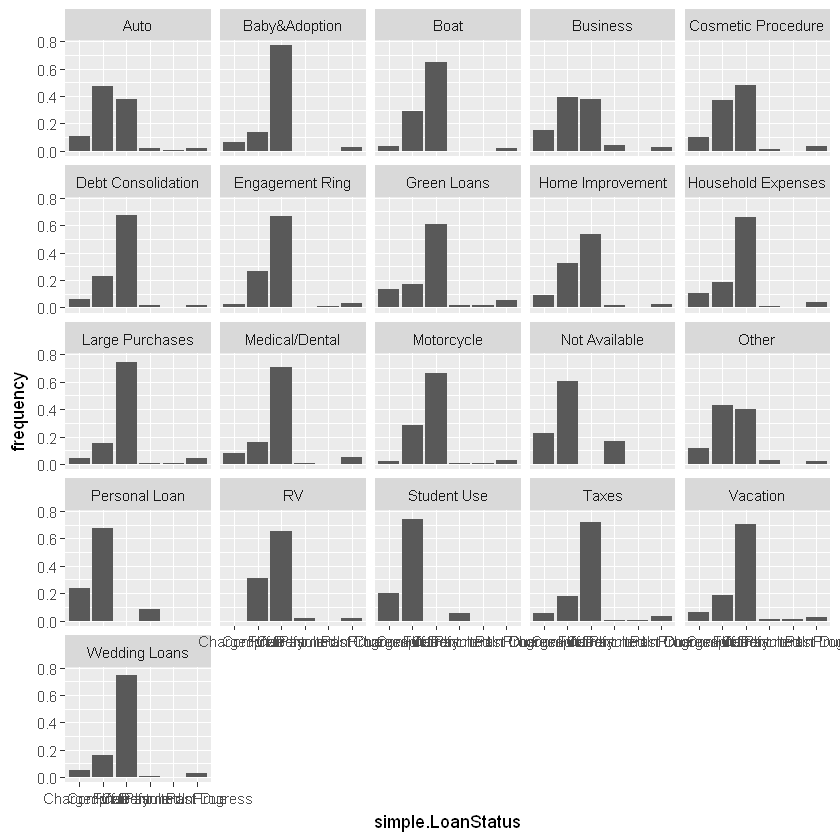

In [60]:
#Are there listing Categories that are more likely to default/go past due/etc?
#need to group Loan Statuses, take frequency
loans %>% 
select(ListingCategory, simple.LoanStatus) %>%
filter(simple.LoanStatus != 'Cancelled') %>%
group_by(ListingCategory, simple.LoanStatus) %>% 
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows)) %>%
ggplot(aes(x=simple.LoanStatus, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~ListingCategory)
#can we add color if default / past due

So there is a lot we can't see in these charts, but mostly checking for distribution here. There are a couple we could check out as abberant, and we can make these charts clearer by reducing the number of loan statuses.  
Iteratively reworked this trellis to be more readable.
<p>Definitely this is a place to zoom in. 3, 12, etc.

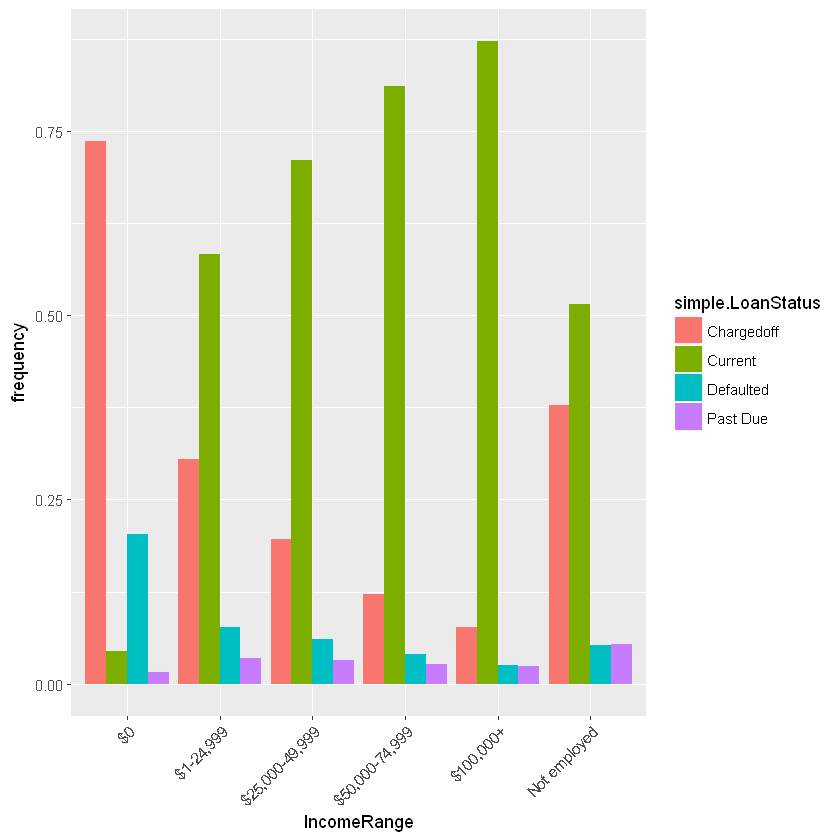

In [74]:
#####Loan Status  vs IncomeRange 
loans %>%
group_by(IncomeRange, simple.LoanStatus) %>%
filter(!simple.LoanStatus == 'Cancelled') %>%
filter(!simple.LoanStatus == 'FinalPaymentInProgress') %>%
filter(!simple.LoanStatus == 'Completed') %>%
filter(!IncomeRange == 'Not displayed') %>%
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows)) %>%
ggplot(aes(x=IncomeRange, y=frequency, fill=simple.LoanStatus)) + geom_bar(stat="identity", position="dodge") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Here we see that people in the $0 and Not employed income ranges have a higher proportion of Chargedoff, Defaulted, and PastDue Loans. Charge offs decrease with higher IncomeRange,  
Eliminated completed loans because that should grow with time based on the mix of borrowers, though same could be said of ChargedOff.

Warning message:
"Removed 591 rows containing missing values (geom_point)."

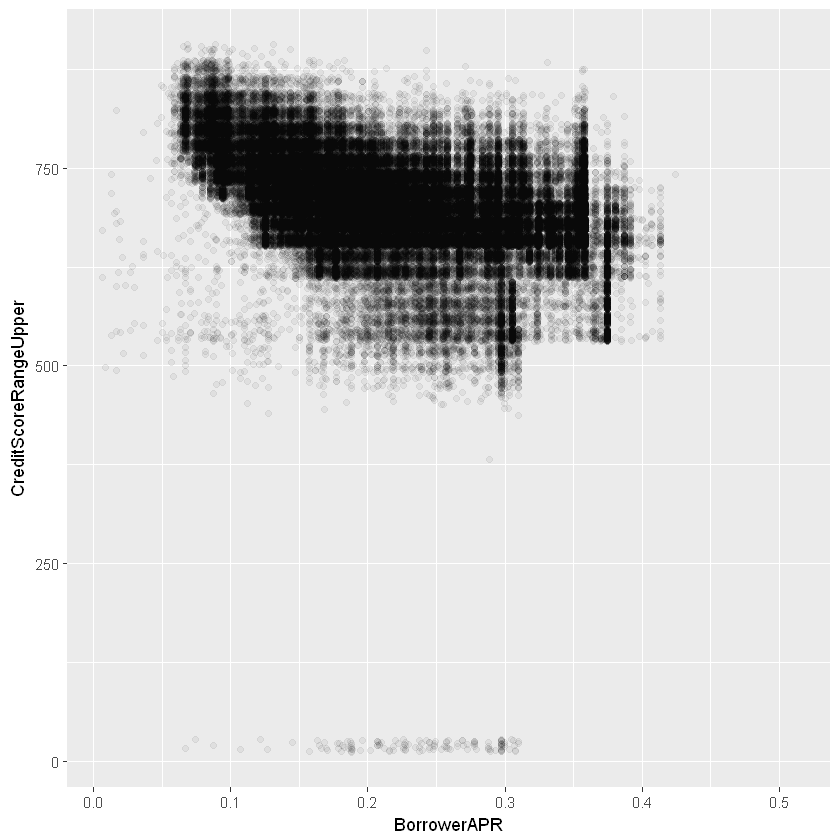

In [75]:
#Borrower APR vs Credit Score Range(s)
ggplot(loans, aes(BorrowerAPR, CreditScoreRangeUpper)) + geom_jitter(alpha = 1/20)

This is some of what we would expect to see. The higher your Credit Score the lower your APR.  
We see some lines at APR's that were present in our overall BorrowerAPR distribution. Especially that line at .3? Wonder if there is legal or psycological at work there.  
Another thing that jumps out is the strange cluster of loans that are hovering right above 0% Apr. We noticed in looking at CreditScores earlier that there are some completely out of logical range. Let's take a look at those.


In [77]:
loans %>%
filter(CreditScoreRangeUpper < 300) %>%
select(contains('Credit')) 

CreditGrade,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,RevolvingCreditBalance,AvailableBankcardCredit
NC,2007-02-11 12:46:31.633000000,0,19,,NA,NA,NA,NA,0
NC,2006-11-10 06:15:36.980000000,0,19,2001-03-21 00:00:00,NA,NA,2,NA,NA
NC,2007-02-06 08:28:22.457000000,0,19,,NA,NA,NA,NA,NA
NC,2006-04-23 14:08:38.650000000,0,19,2000-08-21 00:00:00,NA,NA,6,NA,NA
NC,2006-08-06 10:11:24.640000000,0,19,2001-06-21 00:00:00,NA,NA,2,NA,NA
NC,2006-09-22 06:57:16.473000000,0,19,,NA,NA,NA,NA,NA
NC,2007-01-17 18:44:02.840000000,0,19,2002-05-27 00:00:00,NA,NA,5,NA,NA
NC,2006-12-16 13:21:32.720000000,0,19,2005-10-12 00:00:00,NA,NA,2,NA,NA
NC,2007-01-16 07:22:23.933000000,0,19,,NA,NA,NA,NA,NA
NC,2006-09-16 13:15:04.260000000,0,19,2006-03-03 00:00:00,NA,NA,2,NA,NA


Looks like there is something that causes some people with no credit to be listed with a Lower Credit Score Range of 0 and an Upper of 19. It's interesting to me that loans can be made to these types of users. Might be worth exploring this population further.

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

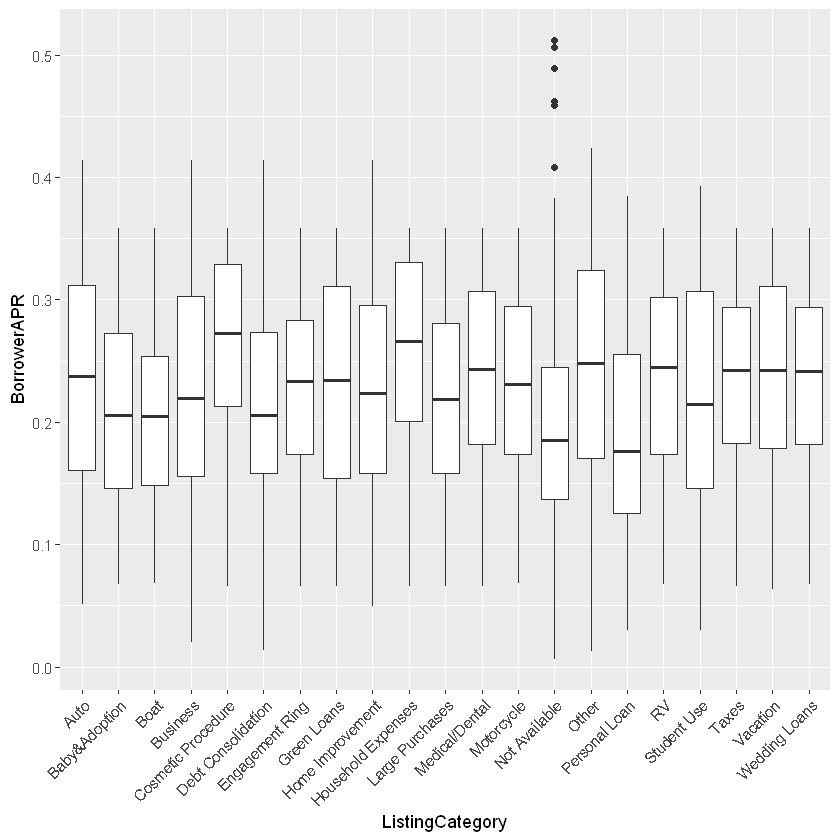

In [92]:
#Borrower APR vs Listing Category
#working
loans %>%
ggplot(aes(y=BorrowerAPR, x=ListingCategory, group=ListingCategory)) + 
geom_boxplot() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
"Removed 1 rows containing missing values (position_stack)."

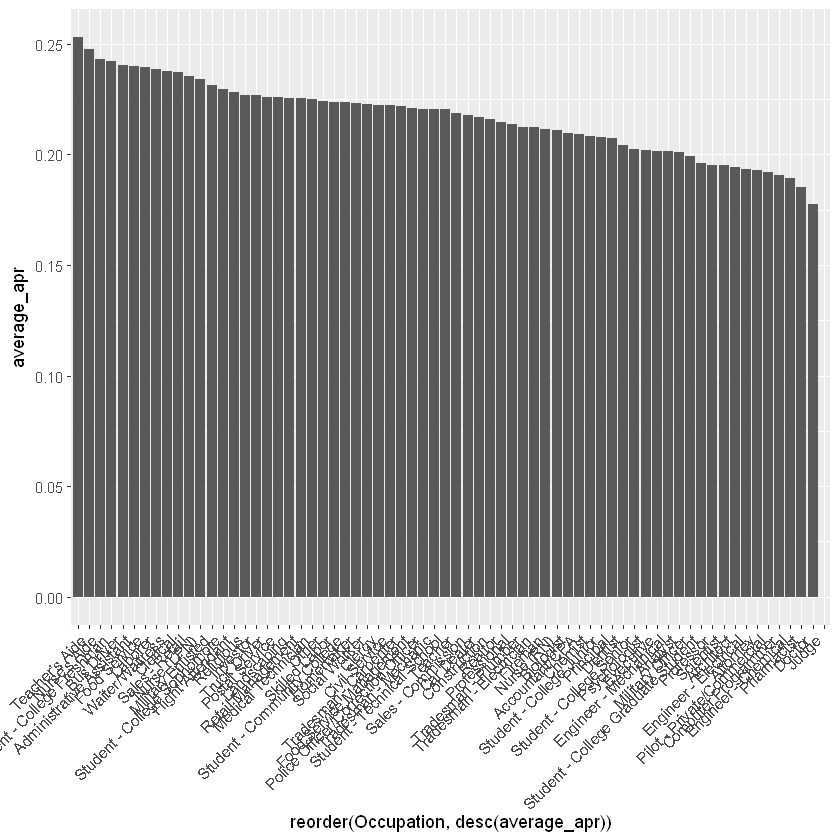

In [93]:
#Borrower APR vs Occupation
#Probably linked to what those occupations make. 
#Let's try something different and bar plot the means
loans %>%
group_by(Occupation) %>%
summarise(average_apr = mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(Occupation,desc(average_apr)), y=average_apr)) + geom_bar(stat = "Identity") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))
#Need to re ararnge and work Income in there are a third variable

Warning message:
"Removed 1 rows containing missing values (position_stack)."

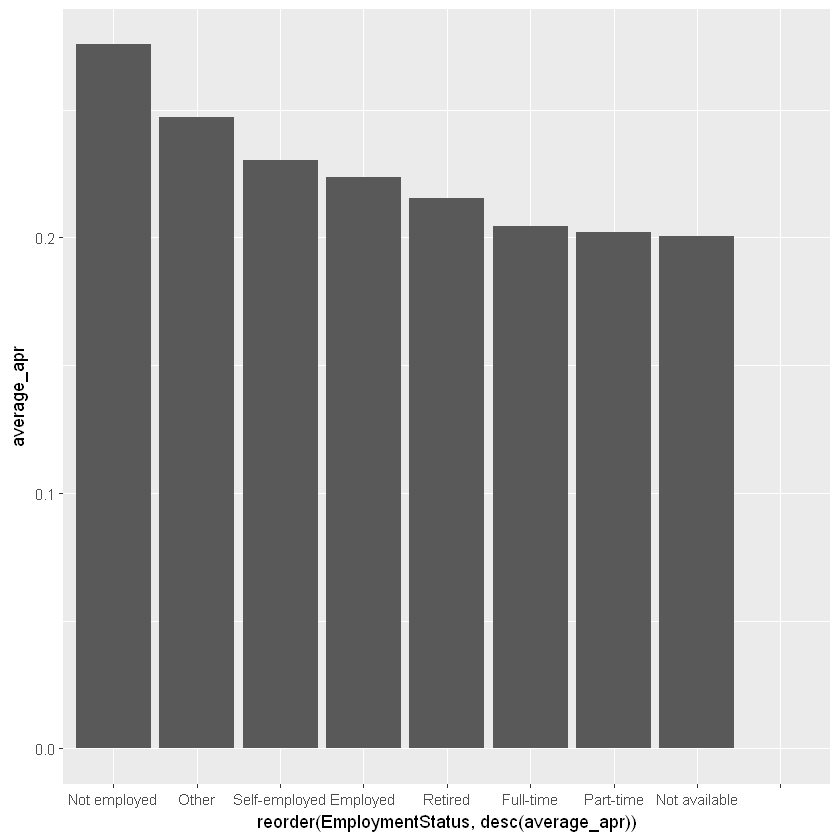

In [94]:
#Borrower APR vs Employment Duration 
#could probably do a t-test here too
#Not available has the lowest average apr?
#should probably be looking with boxplots
loans %>%
group_by(EmploymentStatus) %>%
summarise(average_apr =  mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(EmploymentStatus, desc(average_apr)), y=average_apr)) + geom_bar(stat="Identity")

Warning message:
"Removed 16 rows containing missing values (geom_point)."

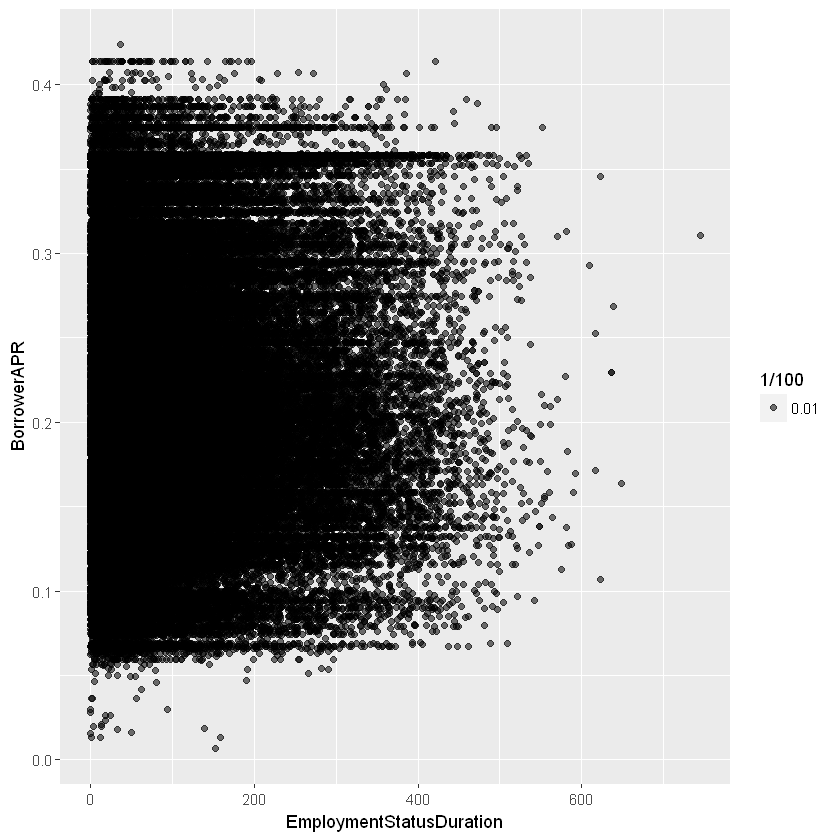

In [95]:
#If employed, does the length of your employment effect borrower apr?
#Normal with spikes? Is there a way to check how normal a distribution is?
loans %>%
filter(EmploymentStatus %in% c('Self-employed','Employed','Full-time','Part-time')) %>%
ggplot(aes(x=EmploymentStatusDuration, y=BorrowerAPR, alpha=1/100)) + geom_point()

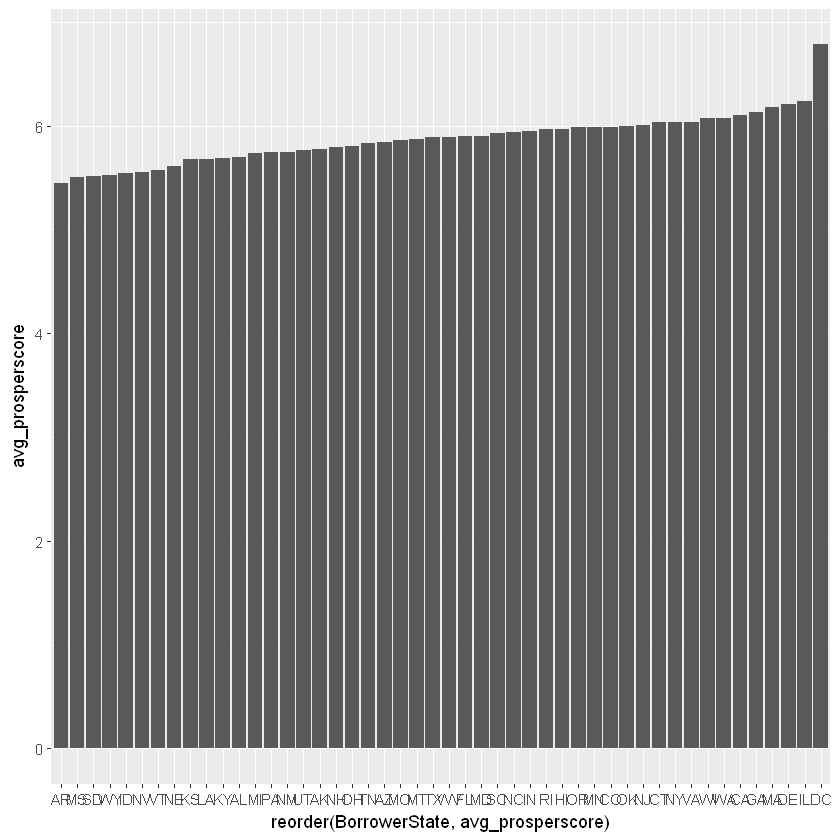

In [96]:
#Prosper Score ----
#ProseperScore vs Borrower State
loans %>%
filter(!is.na(ProsperScore)) %>%
group_by(BorrowerState) %>%
summarise(avg_prosperscore = mean(ProsperScore)) %>%
ggplot(aes(x=reorder(BorrowerState, avg_prosperscore),y=avg_prosperscore)) + 
geom_bar(stat="Identity")

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

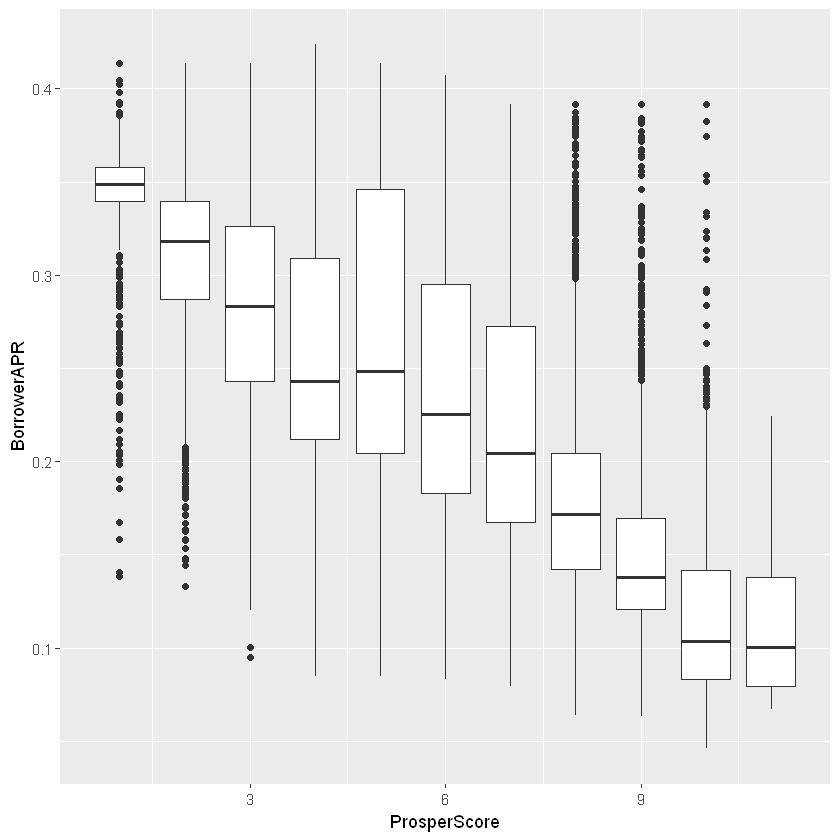

In [97]:
#Prosper Score vs Borrower APR
loans %>%
ggplot(aes(x=ProsperScore, y=BorrowerAPR, group=ProsperScore)) + geom_boxplot()

Fiarly linear, but you can see that the ProsperScore isn't the total predictor in APR

In [99]:
#group employment status type
employed <- c('Self-employed', 'Employed', 'Full-time')
not_answered <- c('Not available', 'Other')
loans %>%
filter(!EmploymentStatus == "" ) %>%
filter(!EmploymentStatus %in% not_answered) %>%
mutate(EmploymentStatus.simple = ifelse(EmploymentStatus %in% employed, "Employed", as.character(EmploymentStatus))) %>%
group_by(EmploymentStatus.simple) %>%
summarise(n())

EmploymentStatus.simple,n()
Employed,99811
Not employed,835
Part-time,1088
Retired,795


Warning message:
"Removed 29084 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 29084 rows containing missing values (geom_point)."

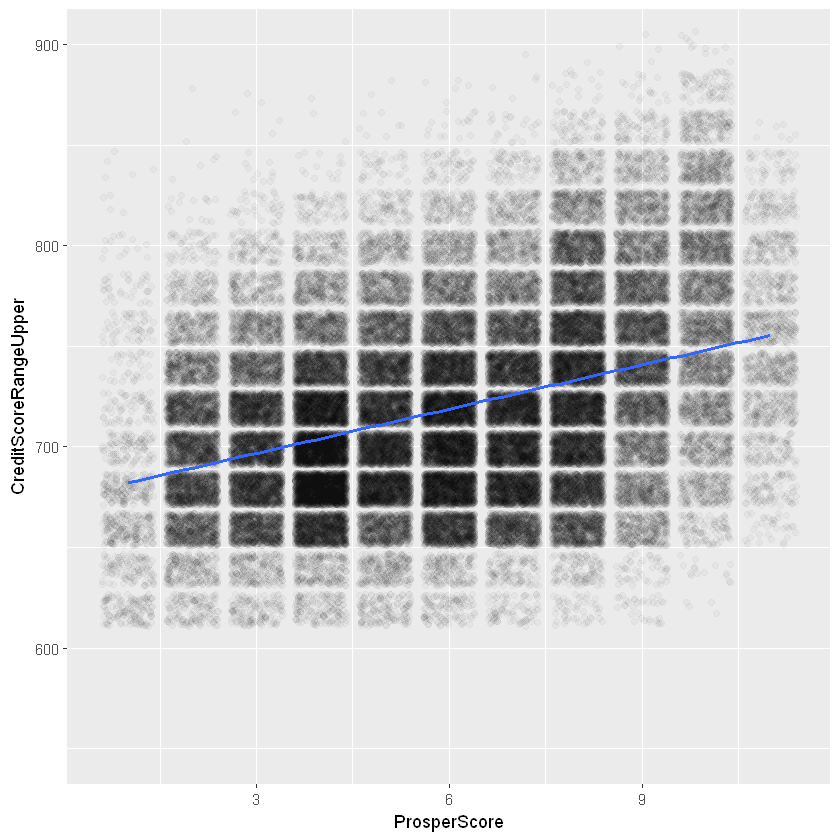

In [100]:
#ProsperScore vs Credit Range
loans %>%
ggplot(aes(x = ProsperScore, y = CreditScoreRangeUpper)) +
geom_jitter(alpha=.03) +
geom_smooth(method="lm") +
coord_cartesian(ylim = c(550, 900))

I like this scatter plot with jitter because you can both see that there aren't many loans in the extremes of either range, and that there is a linear, positive relationship between Credit Score and Prosper Score, which is what we would expect.

In [103]:
#Listing Category ----
#Listing Category vs Borrower State
loans %>%
group_by(BorrowerState, ListingCategory) %>%
summarise(count = n()) %>%
filter(count == max(count))

BorrowerState,ListingCategory,count
,Not Available,5474
AK,Debt Consolidation,104
AL,Debt Consolidation,835
AR,Debt Consolidation,493
AZ,Debt Consolidation,939
CA,Debt Consolidation,7707
CO,Debt Consolidation,1220
CT,Debt Consolidation,966
DC,Debt Consolidation,236
DE,Debt Consolidation,185


I explored the relationship between state and Listing Category, but the overwhelming majority of loans are for Debt Consolidation or have a category of 'Not Available' so there was nothing surprising here.

In [105]:
#Listing Category --
#Occupation
loans %>%
group_by(Occupation, ListingCategory) %>%
summarise(count = n()) %>%
filter(count == max(count)) %>%
filter(ListingCategory != 'Debt Consolidation')
#todo: complete this graph with ListingCategory.simple

Occupation,ListingCategory,count
,Not Available,2255
Homemaker,Not Available,50
Realtor,Not Available,178
Student - College Freshman,Student Use,13
Student - College Graduate Student,Not Available,84
Student - College Junior,Not Available,54
Student - College Senior,Not Available,69
Student - College Sophomore,Not Available,30
Student - Community College,Not Available,13
Student - Technical School,Not Available,9


No real pattern here either.

In [ ]:
#Listing Category vs Employment Status
#Basically, employed vs unemployed vs retired
#Will do this after grouping Employment Status. 
#todo: complete this graph with ListingCategory.simple

In [106]:
#Listing Category vs Credit Score
#Do people with low credit scores list for something in particular?
loans %>%
select(CreditScoreRangeUpper, ListingCategory..numeric.) %>%
filter(CreditScoreRangeUpper > 250) %>%
mutate(bin = ntile(CreditScoreRangeUpper, 5)) %>%
group_by(bin, ListingCategory..numeric.) %>%
summarise(count = n(),
          minCredit = min(CreditScoreRangeUpper),
         maxCredit = max(CreditScoreRangeUpper)) %>%
filter(count == max(count)) 

bin,ListingCategory..numeric.,count,minCredit,maxCredit
1,0,9027,379,659
2,1,12920,659,699
3,1,13701,699,719
4,1,13396,719,759
5,1,10926,759,899


In [ ]:
#--Borrower State
#Occupation
loans %>% 
select(BorrowerState, Occupation) %>%
filter(BorrowerState != "") %>%
group_by(BorrowerState, Occupation) %>%
summarise(count = n()) %>%
filter(Occupation != "Other" & Occupation !="Professional") %>%
filter(count == max(count))


In [ ]:
#Borrower State Income Range (most common)
loans %>%
select(BorrowerState, IncomeRange) %>%
group_by(BorrowerState, IncomeRange) %>%
summarise(count = n()) %>%
filter(count == max(count))

Warning message:
"Removed 591 rows containing missing values (geom_point)."

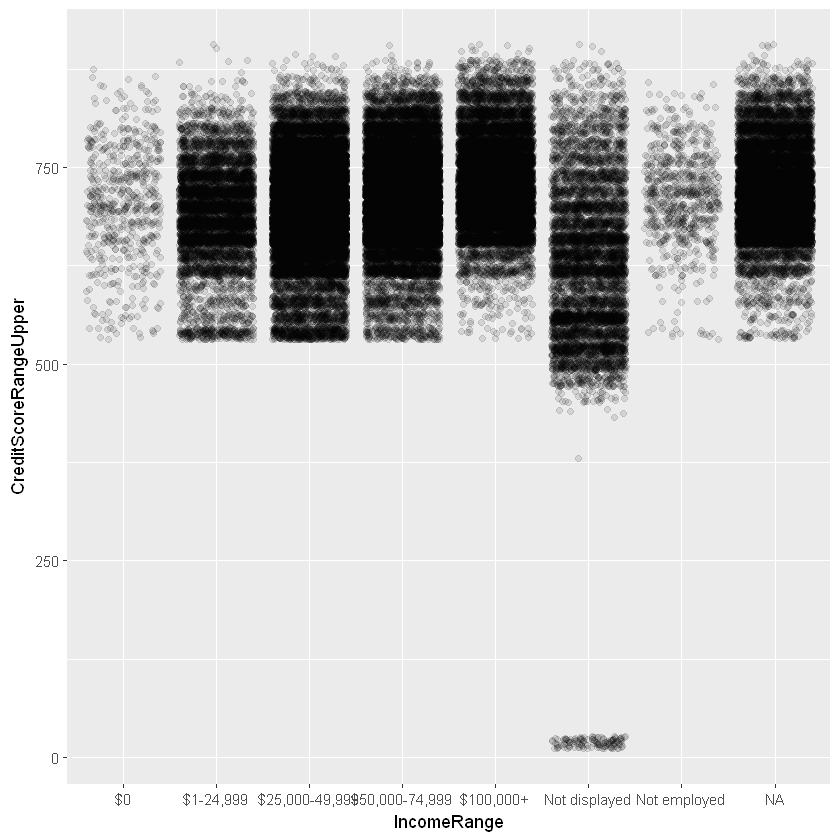

In [9]:
#--Credit Score
#- Income Range
loans %>%
select(CreditScoreRangeUpper, IncomeRange) %>%
ggplot(aes(x = IncomeRange, y = CreditScoreRangeUpper)) + geom_jitter(alpha=.1)

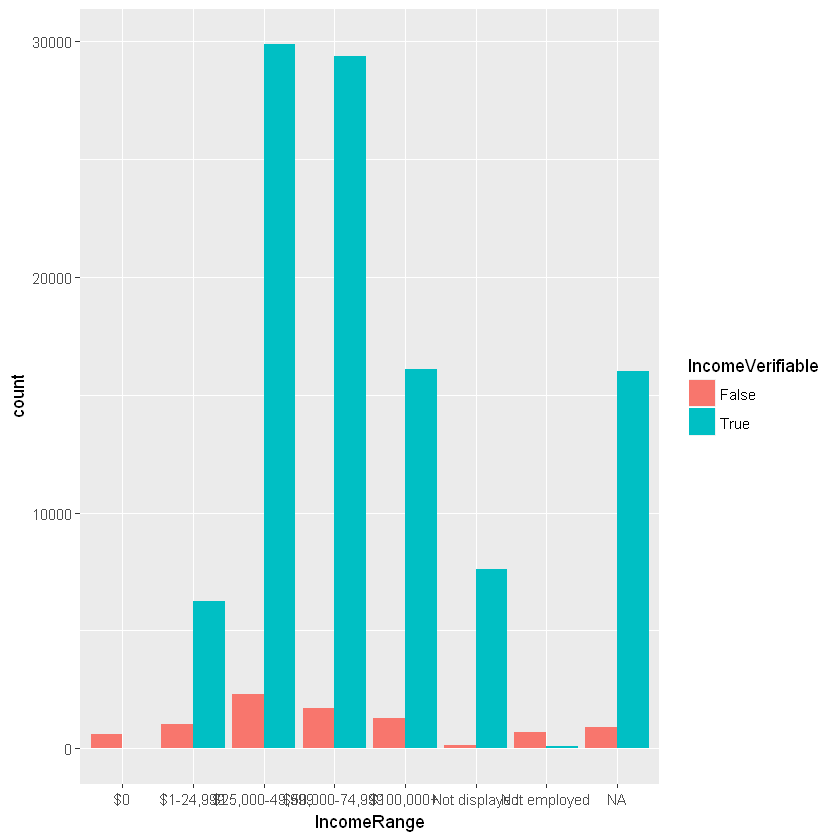

In [13]:
#--Income range
#Income range verified
#Maybe density plots or dodged bar plot?
#Perhaps this is verified to not verified proportions.
loans %>%
ggplot(aes(x=IncomeRange, fill = IncomeVerifiable)) + geom_bar(position="dodge")

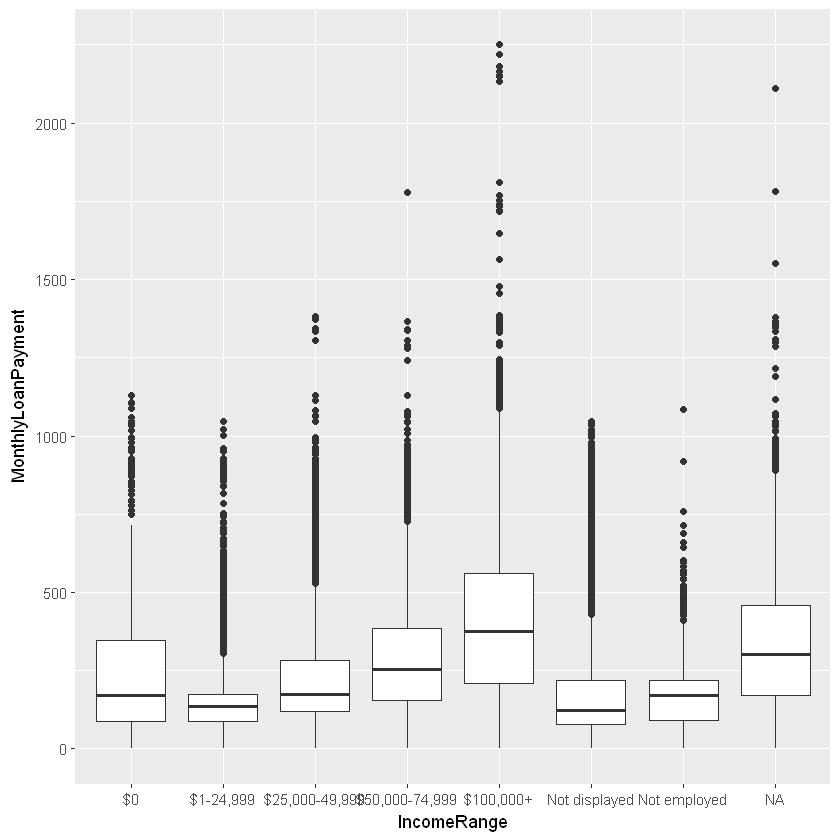

In [17]:
#Income Range by Monthly Loan Payment
loans %>%
ggplot(aes(x = IncomeRange, y = MonthlyLoanPayment)) + geom_boxplot()
#facet into to chart

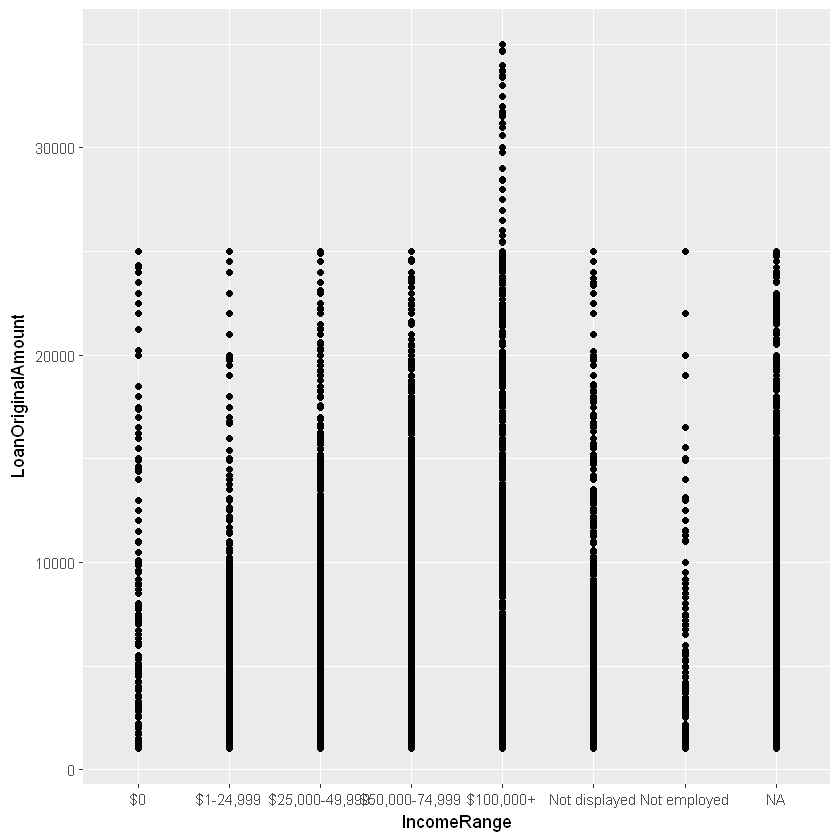

In [16]:
#Income Range by Loan Original Amount
loans %>%
ggplot(aes(x = IncomeRange, y = LoanOriginalAmount)) + geom_point()

In [ ]:
#are there other bivariate plots that should be agains loan original amount?